In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

DARK_READER = True
if DARK_READER:
    plt.rcParams.update({
        "lines.color": "white",
        "patch.edgecolor": "white",
        "text.color": "black",
        "axes.facecolor": "black",
        "axes.edgecolor": "lightgray",
        "axes.labelcolor": "white",
        "axes.titlecolor": "white",
        "xtick.color": "white",
        "ytick.color": "white",
        "grid.color": "lightgray",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black",
    })

In [2]:
import cv2
import numpy as np

In [3]:
image = cv2.imread("license_plate.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(
    gray,
    0,
    255,
    cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU,
)

In [4]:
def imshow(array, bgr=True, cmap=None):
    if array.ndim == 2:
        plt.imshow(array, cmap="gray")
    else:
        if bgr:
            plt.imshow(array[...,::-1], cmap=cmap)
        else:
            plt.imshow(array, cmap=cmap)

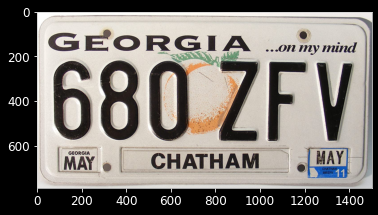

In [5]:
imshow(image)

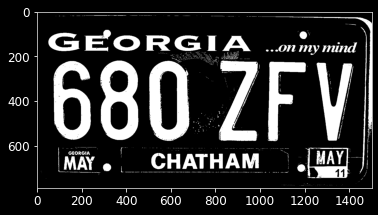

In [6]:
imshow(thresh)

## Usage of `cv2.connectedComponentsWithStats`

In [7]:
#connectivity = 8
connectivity = 4
n_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(
    thresh,
    connectivity,
    cv2.CV_32S,
)

In [8]:
cv2.CV_32S  # is a data type

4

In [9]:
n_labels

1149

In [10]:
np.unique(labels).shape

(1149,)

In [11]:
labels.shape, thresh.shape

((789, 1500), (789, 1500))

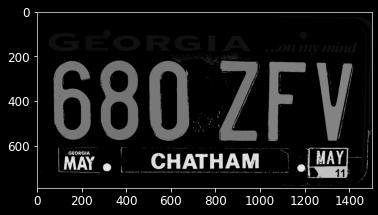

In [12]:
imshow(labels)

In [13]:
np.unique(labels)

array([   0,    1,    2, ..., 1146, 1147, 1148], dtype=int32)

In [14]:
stats

array([[     0,      0,   1500,    789, 907612],
       [   218,     19,    182,      2,    284],
       [    98,     21,      6,      2,      7],
       ...,
       [  1248,    779,      1,      1,      1],
       [  1255,    779,      1,      1,      1],
       [  1266,    779,      1,      1,      1]], dtype=int32)

In [15]:
centroids

array([[ 755.44178129,  393.54858133],
       [ 311.85915493,   19.49647887],
       [ 100.42857143,   21.85714286],
       ...,
       [1248.        ,  779.        ],
       [1255.        ,  779.        ],
       [1266.        ,  779.        ]])

In [16]:
centroids.dtype

dtype('float64')

How Adrian explains:

- `stats`: Statistics on each connected component, including the bounding box coordinates and area (in pixels)
- `centroids` are, obviously, the centroids of the connected components

Need to find some good criteria for discarding uninteresting, extremely small/big connected components.

In [17]:
np.sort(stats[:, cv2.CC_STAT_AREA])

array([     1,      1,      1, ...,  36089,  37184, 907612], dtype=int32)

In [18]:
np.median(stats[:, cv2.CC_STAT_AREA])

2.0

In [19]:
stats[:, cv2.CC_STAT_AREA].shape

(1149,)

In [20]:
areas = np.sort(stats[:, cv2.CC_STAT_AREA])
jumps = (areas[1:] - areas[:-1])[:-1]
jump_idx = np.argmax(jumps)
jump_idx

1141

In [21]:
jump_idx += 2 

In [22]:
[areas[jump_idx + k] for k in range(-5, 5)]

[5236, 6380, 8150, 9107, 22798, 24319, 27378, 31853, 36089, 37184]

In [23]:
areas[1090]

74